---
title: organizational mining(basic)
category: process-mining
tags: python python-lib matplotlib organizational-mining process-mining

---

## what is organizational mining

- Process mining은 보통 크게 두가지로 구분된다(고 생각합니다). 
    - Process model mining and performance analysis: Process model을 구축하고 해당 프로세스 모델이 적합한지 체크, 그리고 해당 process model에서 문제가 되는 부분(performance에 영향을 끼치는 부분, `bottleneck` 등)을 발견하고 향상시키는 것
    - organizational mining: 프로세스는 프로세스 모델과 프로세스를 운영하는 사람(resource(including human and non-humnan))으로 구성되어 있음. 따라서 해당 process model의 적합성을 파악하기 위해서는 process model 뿐만 아니라 resource에 대해서 분석하는 것도 필요함
- 따라서 여기서는 아주 간단한 organizational mining을 진행해봅니다. 

## Organizational mining(basic)

- `coursera`에서 에서 사용하던 [데이터](http://www.processmining.org/event_logs_and_models_used_in_book)를 활용했습니다. 
- 일단은 아주 간단한 알고리즘만 구현하였고, 나머지는 이후에구현할 계획입니다.

In [46]:
#requried lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("running-example-non-conforming.csv", ";")#splitter
print(df.head())

   Case ID  Event ID  dd-MM-yyyy:HH.mm            Activity Resource  Costs
0        1  35654423  30-12-2010:11.02    register request     Pete     50
1        1  35654424  31-12-2010:10.06  examine thoroughly      Sue    400
2        1  35654425  05-01-2011:15.12        check ticket     Mike    100
3        1  35654426  06-01-2011:11.18              decide     Sara    200
4        1  35654427  07-01-2011:14.24      reject request     Pete    200


## resource-activity matrix

- '그 사람이 하는 일이 그 사람이 누구인지를 말해줍니다'라고 생각합니다. 다시 말해서, 조직 내에서 그 사람이 어떤 일들을 하고 있는지를 알면 그 사람이 어떤 사람인지를 알 수 있다 라고 해석할 수 있을 것 같습니다. 
- 따라서, 가장 기본적인 organizational mining을 `resource-activity matirx`를 구성해주는 것입니다.

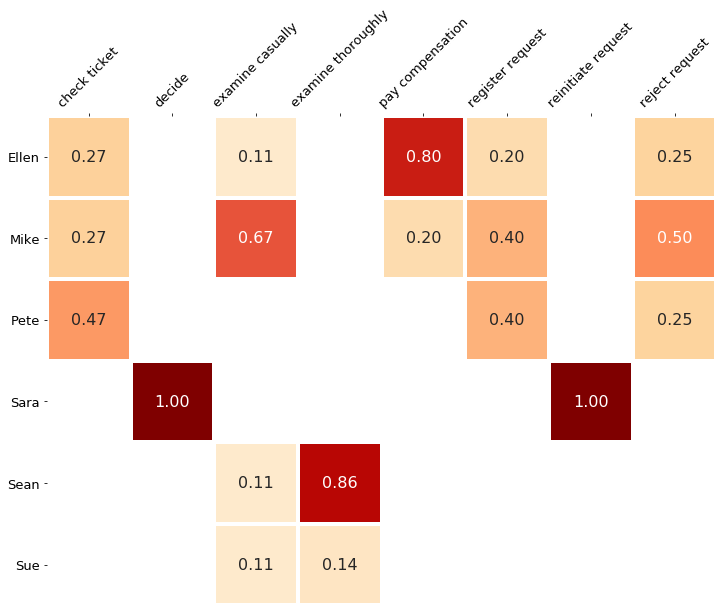

In [48]:
def make_RA_matrix(input_df, r_col_name, a_col_name):
    uniq_acts = set(df[a_col_name])
    uniq_resources = set(df[r_col_name])
    r_a_matrix = {a:{r:0 for r in uniq_resources} for a in uniq_acts}
    
    for i in range(0, len(df)):
        r = df.iloc()[i][r_col_name]
        a = df.iloc()[i][a_col_name]
        r_a_matrix[a][r]+=1
    return pd.DataFrame(r_a_matrix).apply(lambda x: x/sum(x)) #column based 로 나눔
def draw_and_save_RA_matrix(ra_matrix, output_file_path, file_name):
    f = plt.figure(figsize=(12, 9))
    # mask는 굳이 표시되지 않아도 되는 cell을 의미한다.
    mask = R_A_matrix.applymap(lambda x: True if x==0 else False)
    sns.heatmap(R_A_matrix, cmap="OrRd", 
                cbar=False,
                mask=mask,
                annot=True, annot_kws={"size": 16},
                fmt="0.2f", 
                linewidths=3)
    plt.gca().xaxis.tick_top()
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tick_params(labelsize=13)
    plt.savefig(output_file_path+file_name)
    return f
    
temp = make_RA_matrix(df, "Resource", 'Activity')
draw_and_save_RA_matrix(temp, '../../assets/images/markdown_img/', 'ra_matrix.svg')

## similarities of resources 

- 앞서 resource와 activityf 간의 관계를 보여주었다. resource들이 수행한 업무(activity)묶음은 해당 resource에 대한 일종의 profile이라고도 볼 수 있다. 그렇다면 이를 이용해 각 resource 간의 similarity를 볼 수 있지 않을까?

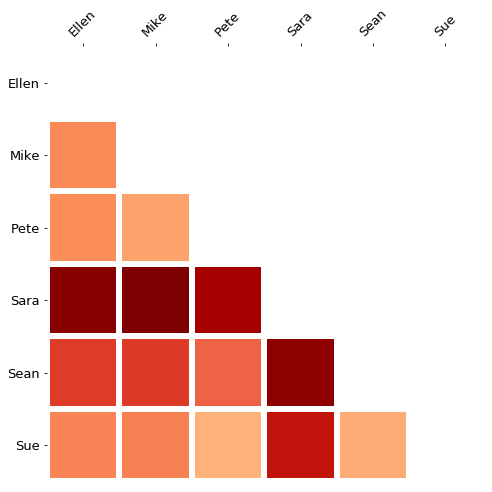

In [49]:
from scipy.spatial import distance

def make_RR_matrix(R_A_matrix):
    RR_matrix = {}
    for idx1 in R_A_matrix.index:
        RR_matrix[idx1] = {}
        for idx2 in R_A_matrix.index:
            profile1 = R_A_matrix.loc()[idx1]
            profile2 = R_A_matrix.loc()[idx2]
            RR_matrix[idx1][idx2] = distance.euclidean(profile1, profile2)
    return pd.DataFrame(RR_matrix)
def draw_and_save_RR_matrix(rr_matrix, output_file_path, file_name):
    f = plt.figure(figsize=(8,8))
    mask = np.zeros_like(rr_matrix)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(rr_matrix, cmap="OrRd", cbar=False, 
                mask=mask, linewidth=5, square=True)
    plt.tick_params(labelsize=13)
    plt.gca().xaxis.tick_top()
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.savefig(output_file_path+file_name)
    return f


# social network based on similarity of profiles 
temp = make_RA_matrix(df, "Resource", 'Activity')
temp = make_RR_matrix(temp)
draw_and_save_RR_matrix(temp, '../../assets/images/markdown_img/', 'rr_matrix.svg')

## further 

- 